Title: Evaluation and Implementation Linear Regression Machine Learning

Team Members:-
Aventika Khemani (14)
Sanika Pareek(03)
Raj Pandey(72)

We are Using USA_Housing.csv 

We are working with 1000 points out of which 700 are used for training and 300 are used for testing

In [7]:
#Group activity 
#Linear Regression
#Best Fitting
#Under Fitting
#Over Fitting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('USA_Housing.csv')
#data = data.replace(['old value'],'new value')
data = data.to_numpy()
#print(data)
#print(data.shape)
# data2 = pd.read_csv("test.csv",delimiter = ",")
# data2 = data2.to_numpy()
t = data.shape[0] - 4000
l = int(t*0.7)
#ll = int(data2.shape[0])
#print(l)
x = data[1:l:1,0]
#print(x)
y = data[1:l:1,5]
#print(y)
#x = np.vstack((np.ones((x.size,)),x)).T
Test_Set_x = data[l:t:1,0]
Test_Set_y = data[l:t:1,5]
#print(len(Test_Set_y))
#Test_Set_x = np.vstack((np.ones((Test_Set_x.size,)),Test_Set_x)).T


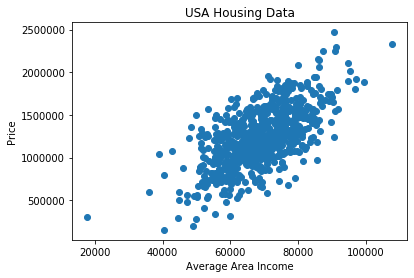

In [8]:
#print("x")
#print(x)
#print("Y")
#print(y)
plt.scatter(x,y)
plt.title('USA Housing Data')
plt.xlabel('Average Area Income')
plt.ylabel('Price')
plt.show()


Gradient descent is used to minimize the parameters m and c of the line.
It is an iterative optimization algorithm used to find the minimum value for a function

Model function is used to calculate values of the parameter using gradient descent algorithm
The cost function is used to calculate performace of the model over all the estimaties
We have to minimize the cost fucntion for all the data points
Cost function is average of sum of square of difference predicted values and actual values


In [9]:
def ModelFunction(x,y,learning_Rate, iterations):
    c = 0
    m = 0
    cm = y.size
    cost_list = []
    for i in range(iterations):
        yp = np.array(x)*m
        yp += c
       # print(yp)
        cost = (1/(2*cm))*np.sum((np.square(yp - y)))
        #print("Cost")
        #print(cost)
        cost_list.append(cost)
        #print("s3")
        #print(s3)
        s2 = (1/cm)*np.sum(np.dot(yp - y,x))
        #print("S2",s2)
        m = m - learning_Rate*s2
        #print("Check This",learning_Rate*s2)
       # print(np.sum(np.multiply(yp- y,x)))
       # print("S2")
        s3 = (1/cm)*np.sum((yp - y))
        c = c - learning_Rate*s3
    return m, c

Learning rate (also referred to as step size or the alpha) is the size of the steps that are taken to reach the minimum. This is typically a small value, and it is evaluated and updated based on the behavior of the cost function. High learning rates result in larger steps but risks overshooting the minimum. Conversely, a low learning rate has small step sizes. While it has the advantage of more precision, the number of iterations compromises overall efficiency as this takes more time and computations to reach the minimum.

BIAS: Bias is the difference between the average prediction of our model and the correct value which we are trying to predict. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data.


Variance is the variability of model prediction for a given data point or a value which tells us spread of our data.Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but has high error rates on test data.

The Line of Best Fit is used to express a relationship in a scatter plot of different data points.
It is an output of regression analysis and can be used as a prediction tool for indicators and price movements.

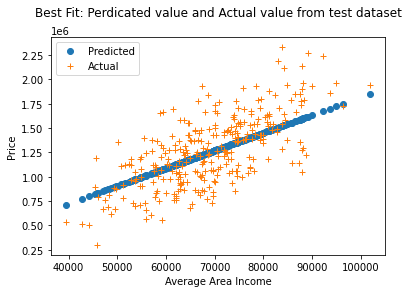

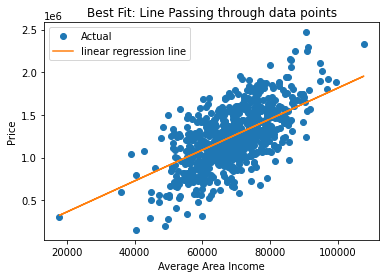

The Bais for Learning Rate 9e-11  is  1249041.9620389869
Variance is :  41169610729.157074


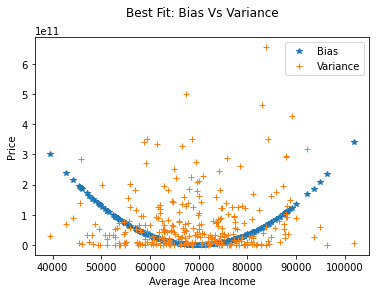

In [63]:
#Best Fit
# Importing the statistics module
import statistics
learning_Rate = 0.00000000009
iterations = 100
m, c= ModelFunction(x,y,learning_Rate=learning_Rate,iterations=iterations)
l_list = []
for i in Test_Set_x:
    l_list.append((i*m+c))

#print("It Represents ", name_list[j])
plt.title('Best Fit: Perdicated value and Actual value from test dataset\n')
plt.xlabel('Average Area Income')
plt.ylabel('Price')
plt.plot(Test_Set_x,l_list,'o',Test_Set_x,Test_Set_y,'+')
plt.legend(["Predicted","Actual"])
plt.show()

#print("Line Drawing through the Data Points for the Best Fit")
plt.plot(x,y,'o',x,m*x+c)
plt.title('Best Fit: Line Passing through data points')
plt.xlabel('Average Area Income')
plt.ylabel('Price')
plt.legend(["Actual","linear regression line"])
plt.show()

bais_sum = np.sum(l_list)

print("The Bais for Learning Rate" ,learning_Rate," is ",statistics.mean(l_list))

#Variance
var_sum = np.sum(Test_Set_y)
var_mean = var_sum/len(Test_Set_y)
var_mean = statistics.mean(Test_Set_y)
sum = 0 
p_list = []
t_list = []
for j in range(len(l_list)):
    p_list.append(((l_list[j]-statistics.mean(Test_Set_y))**2))
    t_list.append((l_list[j]-Test_Set_y[j])**2)
    sum += ((l_list[j]-statistics.mean(Test_Set_y))**2)
print("Variance is : ", sum/(len(Test_Set_y)-1))
plt.title('Best Fit: Bias Vs Variance\n')
plt.xlabel('Average Area Income')
plt.ylabel('Price')
plt.plot(Test_Set_x,p_list,'*',Test_Set_x,t_list,'+')
plt.legend(["Bias","Variance"])
plt.show()




Overfitting has High accuracy for Training dataset and low accuracy for testing dataset. It has a high variance as the model changes with data, it also has low bias as the predicted and actual output doesn't have large difference

18.14517025902404


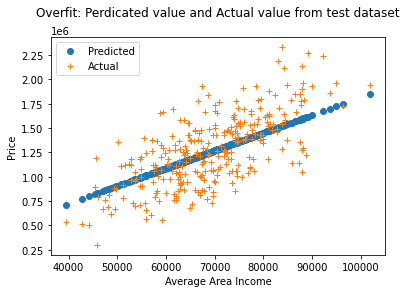

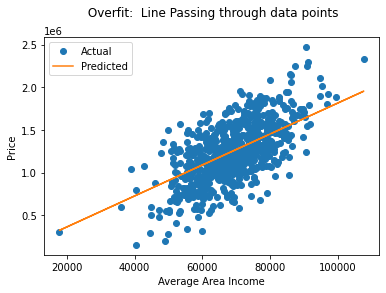

The Baise for Learning Rate  6e-11  is  1249041.962039302
Variance is :  1606662406469.4182


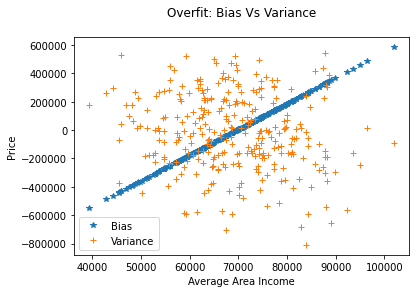

In [64]:
#Overfitting
learning_Rate = 0.00000000006
iterations = 100
m, c= ModelFunction(x,y,learning_Rate=learning_Rate,iterations=iterations)
print(m)
l_list = []
for i in Test_Set_x:
    l_list.append((i*m+c))

#print("It Represents ", name_list[j])
plt.title('Overfit: Perdicated value and Actual value from test dataset\n')
plt.xlabel('Average Area Income')
plt.ylabel('Price')
plt.plot(Test_Set_x,l_list,'o',Test_Set_x,Test_Set_y,'+')
plt.legend(["Predicted","Actual"])
plt.show()

#print("Line Drawing through the Data Points for the Best Fit")
plt.title(' Overfit:  Line Passing through data points\n')
plt.xlabel('Average Area Income')
plt.ylabel('Price')
plt.plot(x,y,'o',x,m*x+c)
plt.legend(["Actual","Predicted"])
plt.show()

bais_sum = np.sum(l_list)
print("The Baise for Learning Rate ",learning_Rate," is ",bais_sum/len(l_list))

#Variance
var_sum = np.sum(Test_Set_y)
var_mean = var_sum/len(Test_Set_y)

sum = 0 
p_list = []
t_list = []
for j in range(len(l_list)):
    p_list.append(l_list[j]-statistics.mean(Test_Set_y))
    t_list.append(l_list[j]-Test_Set_y[j])
    sum += ((j-statistics.mean(Test_Set_y))**2)
print("Variance is : ", sum/(len(Test_Set_y)-1))
plt.title('Overfit: Bias Vs Variance\n')
plt.xlabel('Average Area Income')
plt.ylabel('Price')
plt.plot(Test_Set_x,p_list,'*',Test_Set_x,t_list,'+')
plt.legend(["Bias","Variance"])
plt.show()



In underfitting the Training and Testing accuracy is very low and it is not able to establish a generalized trend among data in dataset. It has High Bias as there is large difference in predicted and actual output, Low Variance as the model doesn't change with the data

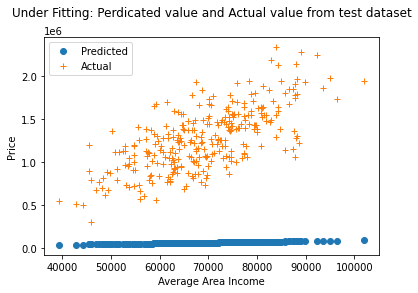

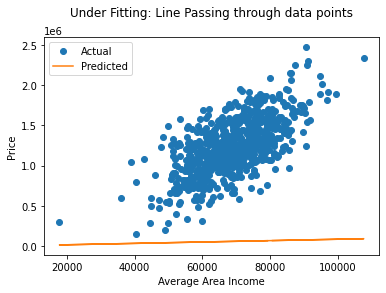

The Baise for Learning Rate  1e-13 is  58961.399953626766
Variance is :  1606662406469.417


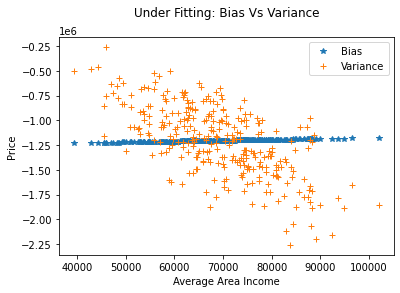

In [65]:
#UnderFitting
learning_Rate = 0.0000000000001
iterations = 100
m, c= ModelFunction(x,y,learning_Rate=learning_Rate,iterations=iterations)
l_list = []
for i in Test_Set_x:
    l_list.append((i*m+c))

#print("It Represents ", name_list[j])
plt.title('Under Fitting: Perdicated value and Actual value from test dataset\n')
plt.xlabel('Average Area Income')
plt.ylabel('Price')
plt.plot(Test_Set_x,l_list,'o',Test_Set_x,Test_Set_y,'+')
plt.legend(["Predicted","Actual"])
plt.show()

#print("Line Drawing through the Data Points for the Best Fit")
plt.title('Under Fitting: Line Passing through data points\n')
plt.xlabel('Average Area Income')
plt.ylabel('Price')
plt.plot(x,y,'o',x,m*x+c)
plt.legend(["Actual","Predicted"])
plt.show()

bais_sum = np.sum(l_list)
print("The Baise for Learning Rate ",learning_Rate,"is ",bais_sum/len(l_list))

#Variance
var_sum = np.sum(Test_Set_y)
var_mean = var_sum/len(Test_Set_y)

sum = 0 
p_list = []
t_list = []
for j in range(len(l_list)):
    p_list.append(l_list[j]-var_mean)
    t_list.append(l_list[j]-Test_Set_y[j])
    sum += ((j-var_mean)**2)
print("Variance is : ", sum/(len(Test_Set_y)-1))
plt.title('Under Fitting: Bias Vs Variance\n')
plt.xlabel('Average Area Income')
plt.ylabel('Price')
plt.plot(Test_Set_x,p_list,'*',Test_Set_x,t_list,'+')
plt.legend(["Bias","Variance"])
plt.show()

